In [92]:
""" Importing the libraries  """

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale = 1.5, rc={"grid.linewidth": 0.3})


In [110]:
""" Preparing the datasets  """

#Loading partially preprocessed data
data_lcd = pd.read_csv('lcd_p.csv')
data_crt = pd.read_csv('crt_p.csv')

#Changing column names for convenience
data_lcd.columns = ['slice', 'area', 'mean', 'min', 'max']
data_crt.columns = ['slice', 'area', 'mean', 'min', 'max']

#Adding a time column by converting the slices to seconds with 1 slice == 0.03 seconds
data_lcd['time'] = round((data_lcd['slice']/0.03)/1000,3)
data_crt['time'] = round((data_crt['slice']/0.03)/1000,3)

#Getting the desired columns from the two datasets: max brightness and time in seconds
data_lcd_max = data_lcd['max']
data_crt_max = data_crt['max']

data_lcd_time = data_lcd['time']
data_crt_time = data_crt['time']


In [111]:
data_lcd.head()

,slice,area,mean,min,max,time
0,1,98,96.245,86,103,0.033
1,2,98,68.898,58,78,0.067
2,3,98,0.000,0,0,0.100
3,4,98,179.878,171,188,0.133
4,5,98,0.000,0,0,0.167


In [112]:
data_crt.head()

,slice,area,mean,min,max,time
0,1,70,255.000,255.0,255.0,0.033
1,2,70,151.686,100.0,210.0,0.067
2,3,70,52.914,37.0,77.0,0.100
3,4,70,23.700,16.0,35.0,0.133
4,5,70,9.414,5.0,12.0,0.167


In [130]:
""" Plotting the perceived brigthness  """

#Creating a function for plotting
def plotting(time, max_value, monitor):
    plt.figure(figsize=(10,6))
    plt.plot(time,max_value)
    plt.title("Perceived Brightness for {}".format(monitor))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Maximum gray value (pixels)")
    plt.axhline(y=max_value.max(), color='r', ls='--')
    plt.gca().set_ylim(0,280)
    plt.show()
    
    

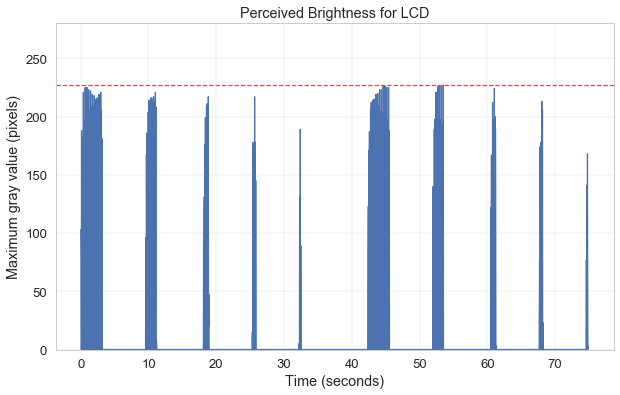

In [131]:
plotting(data_lcd_time,data_lcd_max, 'LCD')

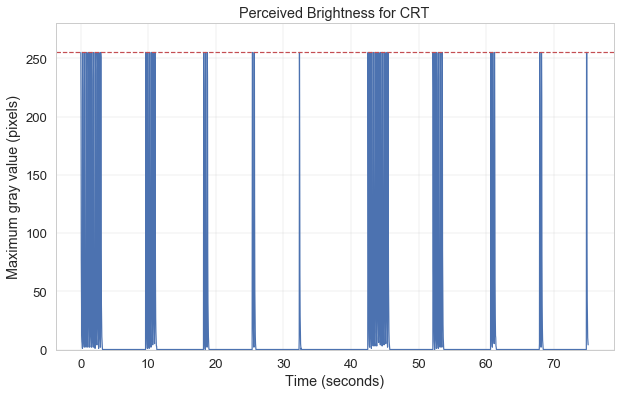

In [132]:
plotting(data_crt_time,data_crt_max, 'CRT')

## The rest is random stuff yet to be made sense of 

In [180]:
def results_table(lcd, crt):
    table = []
    for c in ['mean','max', 'min']:
        table.append({c:lcd[c].mean()})
        table.append({c:crt[c].mean()})
    return table



In [181]:
results = results_table(data_lcd, data_crt)

In [172]:
results

[{'mean': 16.056135796972406},
 {'mean': 11.610629662522197},
 {'max': 17.136242208370437},
 {'max': 14.735346358792185},
 {'min': 14.909617097061442},
 {'min': 8.233126110124333}]